In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', None)

In [0]:
players_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/Players_Clean.pkl')
stats_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/stats_Clean.pkl')
sofifa_ratings_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/sofifa_head_Clean.pkl')

corr_df = pd.DataFrame(columns=None)

In [902]:
print(sofifa_ratings_df)

       sofifa_id         short_name                            long_name  age  \
0         158023           L. Messi       Lionel Andrés Messi Cuccittini   32   
1          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2         190871          Neymar Jr        Neymar da Silva Santos Junior   27   
3         200389           J. Oblak                            Jan Oblak   26   
4         183277          E. Hazard                          Eden Hazard   28   
...          ...                ...                                  ...  ...   
15426     223905              P. Ng                             Perry Ng   18   
15454     194372        M. Taşkıran             Mahmut Ertuğrul Taşkıran   24   
15457     220939         L. Pilling                         Luke Pilling   16   
15458     222997           M. Maier                         Marcus Maier   18   
15463     222947          T. Davies                           Tom Davies   22   

             dob  height_cm

In [903]:
print(players_df)

             tm_id                  name               club     nationality  \
DOB                                                                           
1986-03-27   17259          Manuel Neuer      Bayern Munich         Germany   
1988-08-03   40680          Sven Ulreich      Bayern Munich         Germany   
2000-01-28  336307     Christian Früchtl      Bayern Munich         Germany   
1999-04-04  317444  Ron-Thorben Hoffmann      Bayern Munich         Germany   
1996-02-14  281963       Lucas Hernández      Bayern Munich          France   
...            ...                   ...                ...             ...   
1994-10-01  147540           Ales Cermak  FC Viktoria Plzen  Czech Republic   
1992-04-17  384856          Joel Kayamba  FC Viktoria Plzen           Congo   
1995-10-17  365861           Ubong Ekpai  FC Viktoria Plzen           Niger   
1992-03-21  198395   Jean-David Beauguel  FC Viktoria Plzen          France   
1995-01-26  198614           Tomas Chory  FC Viktori

In [904]:
print(pd.unique(players_df['main_field_position']))

[goalkeepers, defenders, midfielders, attackers]
Categories (4, object): [goalkeepers, defenders, midfielders, attackers]


In [0]:
players_df.reset_index(drop=True, inplace=True)

terminate_players = players_df[(players_df['main_field_position'] != 'attackers')\
                               #comment this
                               | (players_df['sofifa_id'].isna())\
                               #####
                               ].index
players_df.drop(terminate_players, inplace=True)
players_df.reset_index(drop=True, inplace=True)

corr_df['tm_id'] = players_df['tm_id']
#comment this
corr_df['sf_id'] = players_df['sofifa_id']
#####

In [0]:
 corr_df['sf_id'] = corr_df['sf_id'].astype(int)

In [907]:
print(corr_df)

       tm_id   sf_id
0     243714  213345
1     159471  206113
2      58358  189596
3     102226  203486
4     401173  233049
...      ...     ...
2736  296783  220715
2737  384856  247045
2738  365861  244790
2739  198395  216793
2740  198614  244793

[2741 rows x 2 columns]


In [0]:
stats_df.reset_index(drop=True, inplace=True)

terminate_stats = stats_df[(stats_df['season'] != '13/14') | (~stats_df['tm_id'].isin(corr_df['tm_id']))].index
stats_df.drop(terminate_stats, inplace=True)
stats_df.drop(columns=['club', 'season', 'competition'], inplace=True)
stats_df.reset_index(drop=True, inplace=True)
mean_stats = pd.pivot_table(stats_df, index='tm_id', columns='attribute', values='value', aggfunc=np.mean, fill_value=0)
stats_df = pd.pivot_table(stats_df, index='tm_id', columns='attribute', values='value', aggfunc=np.sum, fill_value=0)
stats_df['ppg'] = mean_stats['ppg'] / 100

In [0]:
corr_df.set_index('tm_id', inplace=True)

corr_df[['app', 'a', 'g', 'mpg', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]\
	 = stats_df[['app', 'a', 'g', 'mpg', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]

In [0]:

terminate_sofifa = sofifa_ratings_df[(sofifa_ratings_df['game_year'] != '2015-01-01')\
	#  | (~sofifa_ratings_df['sofifa_id'].isin(corr_df['sf_id']))\
	 ].index
sofifa_ratings_df.drop(terminate_sofifa, inplace=True)

sofifa_ratings_df.set_index('sofifa_id', inplace=True)
corr_df.set_index('sf_id', drop=True, inplace=True)

corr_df['rating'] = sofifa_ratings_df['overall']


In [0]:
terminate_corr = corr_df[\
                         #comment this
                         (corr_df['rating'].isna()) |\
                         #####
                           (corr_df['ppg'].isna())].index
corr_df.drop(terminate_corr, inplace=True)
corr_df.reset_index(drop=True, inplace=True)

In [912]:
print(corr_df)

     app    a     g     mpg      mp   og       ppg   yc  syc   rc   son  soff  \
0   19.0  3.0   6.0   690.0  1157.0  0.0  0.010910  3.0  0.0  0.0   8.0   2.0   
1   20.0  1.0   1.0  1197.0  1197.0  0.0  0.007500  3.0  0.0  0.0   8.0   2.0   
2   17.0  0.0   4.0   245.0  1001.0  0.0  0.004800  3.0  1.0  1.0   6.0   4.0   
3   14.0  3.0   8.0   119.0   953.0  0.0  0.015700  1.0  0.0  0.0   4.0   4.0   
4   27.0  2.0   1.0   329.0  1447.0  0.0  0.014067  5.0  0.0  0.0  10.0  15.0   
5   36.0  2.0   4.0   470.0  2129.0  0.0  0.010800  3.0  0.0  0.0  15.0   9.0   
6   16.0  0.0   3.0   423.0   533.0  0.0  0.007167  0.0  0.0  0.0  10.0   5.0   
7    1.0  0.0   1.0   120.0   120.0  0.0  0.000000  1.0  0.0  0.0   0.0   0.0   
8   53.0  8.0  25.0   886.0  3858.0  0.0  0.016717  6.0  0.0  0.0  10.0  15.0   
9   21.0  1.0   2.0   526.0  1247.0  0.0  0.011200  1.0  0.0  0.0   8.0   6.0   
10   6.0  0.0   0.0     0.0    72.0  0.0  0.003300  0.0  0.0  0.0   6.0   0.0   
11  38.0  1.0   4.0   952.0 

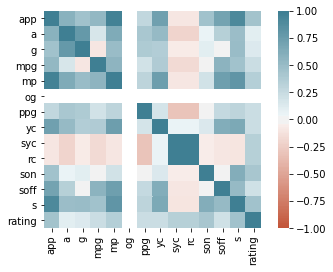

In [913]:
corr = corr_df.corr()
mapping = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [0]:
plt.show()